# Домашнее задание #2 по курсу Analysis and Visualization of Networks

**Дедлайн**: 11.03.2024 в 00:00 (AoE)

Вас пригласили для планирования рекламной кампании по продаже нового убийцы iPhone в социальных сетях. Для продвижения нового устройства среди целевой аудитории продукта вы решаете ~~забыть его в баре~~ привлечь к продвижению продукта нескольких участников социальных сетей. Для привлечения Вы предоставляете блоггеру образец товара (стоимостью 15 000 рублей) и заключаете с ним контракт на размещение поста на личной странице. **Минимальная** стоимость контракта с блоггером пропорциональна количеству друзей и рассчитывается как $P_i = 15 000 + 100*D_i$ где $D_i$ - количество друзей i блоггера. Выделенный Вам рекламный бюджет составляет 500 000 рублей.

За каждого человека, купившего Ваш товар (контрактники получают телефон в подарок!) Ваш счёт (и рекламный бюджет!) пополняется на 700 рублей, кроме того покупатель на следующий день поделится хорошими впечатлениями от покупки на своей странице. Если 1/5 от всех друзей пользователя начнут пользоваться Вашим устройством, то пользователь тоже захочет его купить (начнёт следовать тренду) и принесет Вам прибыль. Кампания длится 180 дней (тактов симуляции). Обратите внимание, что пользователи, купившие смартфон в i-й день, смогут похвастаться им (и повлиять на соседей) только на следующий, продажные блоггеры хвастаются смартфоном сразу.

Механизм проверки последовательно обрабатывает список и активирует указанные участником узлы по одному узлу в день. В случае, если узел уже активирован, берется следующий по списку. В случае, если узлы в списке закончились, симуляция останавливается.

В случае, если рекламный бюджет не позволяет активировать следующий узел, участник пропускает ход пока не накопит нужную для активации сумму на счёте. 

Основной целью рекламной кампании является максимальная прибыль (точнее, минимизация убытка)

## Формат отправки результатов работы алгоритма:

Соревнование проводится в полузакрытом формате т.е. участники соревнуются на открытом наборе данных, после чего высылают на почту iakarpov@hse.ru не позднее чем 11.03.2024 в 00:00 (AoE) лучшую версию алгоритма для проверки на закрытом наборе данных, представляющем собой граф с аналогичными свойствами (количество вершин, ребер, диаметр, количество сообществ, средняя степень вершины будут совпадать). Дополнительные пожелания к аналогичным свойствам графа можно обсудить на семинаре. 

Письмо должно иметь тему \<surname\>_HW2, и содержать содержащее файл \<surname\>.csv, содержащий данные о последовательности активации вершин графа для открытого набора и файл \<surname\>.ipynb, содержаший код по получению файла \<surname\>.json, где \<surname\> - фамилия студента. Позже прикручу бота для построения лидерборда для открытого набора.

## Правила оценивания:

Проигрыш weak baseline (**прибыль** 600 000 рублей) - 4 балла

Выигрыш у weak baseline, проигрыш strong baseline q4: 5 баллов

Выигрыш у weak baseline, проигрыш strong baseline q3: 6 баллов

Выигрыш у weak baseline, проигрыш strong baseline q2, q1: 7 баллов

Выигрыш у strong baseline (**прибыль** 885 000 рублей) - 8 баллов

top2,3,4 - 9 баллов

top1,2 - 10 баллов

Примечание: прибыль 600 000 рублей, означает что Ваш балланс 1 100 000 рублей, прибыль 885 000 рублей, означает что Ваш балланс 1 385 000 рублей.

Бюджеты:
- Изначально имеем 500 000₽.
- Контакт с блоггером i стоит $P_i = 15 000 + 100*D_i$ где $D_i$ - количество друзей i блоггера
- За каждого человека, купившего Ваш товар (контрактники получают телефон в подарок!) Ваш счёт (и рекламный бюджет!) пополняется на 700 рублей.

Правила распространения тренда:
- Покупатель на следующий день поделится хорошими впечатлениями от покупки на своей странице. 
- Пользователи, купившие смартфон в i-й день, смогут похвастаться им (и повлиять на соседей) только на следующий, продажные блоггеры хвастаются смартфоном сразу.
- Если 1/5 от всех друзей пользователя начнут пользоваться Вашим устройством, то пользователь тоже захочет его купить (начнёт следовать тренду) и принесет Вам прибыль. 
- Компания длится 180 дней (тактов симуляции). 

Правила симуляции:
- Механизм проверки последовательно обрабатывает список и активирует указанные участником узлы по одному узлу в день. В случае, если узел уже активирован, берется следующий по списку. В случае, если узлы в списке закончились, симуляция останавливается.
- В случае, если рекламный бюджет не позволяет активировать следующий узел, участник пропускает ход пока не накопит нужную для активации сумму на счёте. 

Основной целью рекламной кампании является максимальная прибыль (точнее, минимизация убытка)

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [2]:
import os
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
import random

random.seed(0)
np.random.seed(0)

In [3]:
if not os.path.exists('edges.txt'):
    !wget -O edges.txt 'https://dl.dropboxusercontent.com/scl/fi/2jmnf8q68rc8018owvttb/edges.txt?rlkey=tma02olngfl4qabbwem1hb37s'

G = nx.read_edgelist("edges.txt")
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))

Number of nodes 3953
Number of edges 84070


- так понимаю за шаг можно активировать только одного человека - да
- как строить оптимизацию тут?)

- посортировать по центральностям?)

- мы можем просимулировать тот момент, после которого цена начнёт падать и обрезать список кандидатов :D
- можно симулировать распространение и каждые 10 итераций перерассчитывать кандидатов
- можно выбрасывать покрашенные вершины, но попарно соединять соседей каждой такой. Либо мы можем их просто выбрасывать из кандидатов - не нихуя, они и так не влияют на порядок)
- возможно стоит добавить вес в центральности исходя из числа покрашенных соседей

- сделать релаксацию, убирать последнюю вершину, проверять, как там без неё, пока прибыль растёт

100%|██████████| 180/180 [00:05<00:00, 32.68it/s]


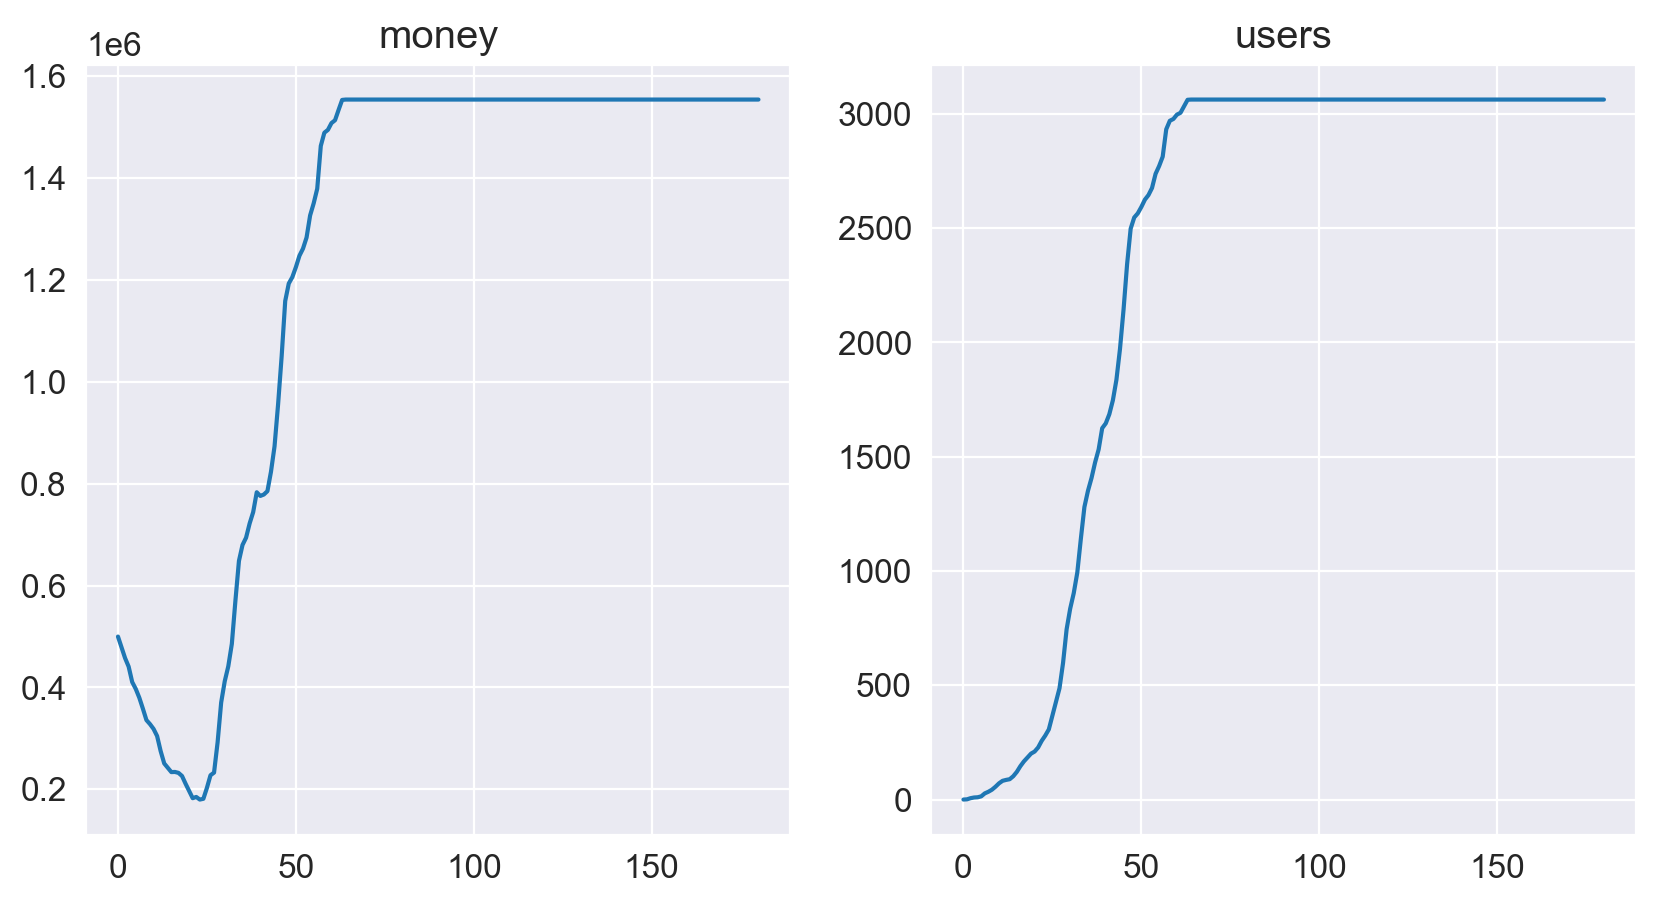

Max budget: 1554300
Max budget step: 64


In [4]:
from activations import *
activation = get_activation_list(G)
test_activation_list(G, activation);

In [6]:
activation_data = pd.DataFrame({
    'Node': activation
})
activation_data.to_csv('activation_list.csv', index=False)